# TIME SERIES ANALYSIS IN PYTHON

In [ ]:
# USEFUL PANDAS TOOLS

#Changing an index to a datetime
pd.to_datetime(df.index)

#Joining two dataframes
df1.join(df2)

#Resample data (e.g. from daily to weekly)
df = df.resample(rule='W', how='last')

#Computing the percent changes in a time series
df['col'].pct_change()

#Computing differences in a time series
df['col'].diff()

#Correlation
df['ABC'].corr(df['XYZ'])

#AutoCorrelation
df['ABC'].autocorr()


# CORRELATION & AUTOCORRELATION

## Common Mistake: Correlation of two trending Series
- if two series are trending then correlation will be high
- you want to examine the correlation between returns, not absolute levels
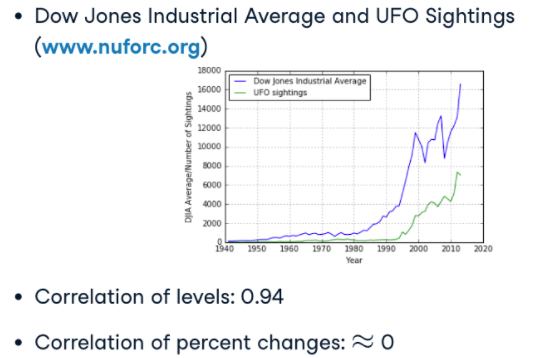


# SIMPLE LINEAR REGRESSION OF TWO TIME SERIES
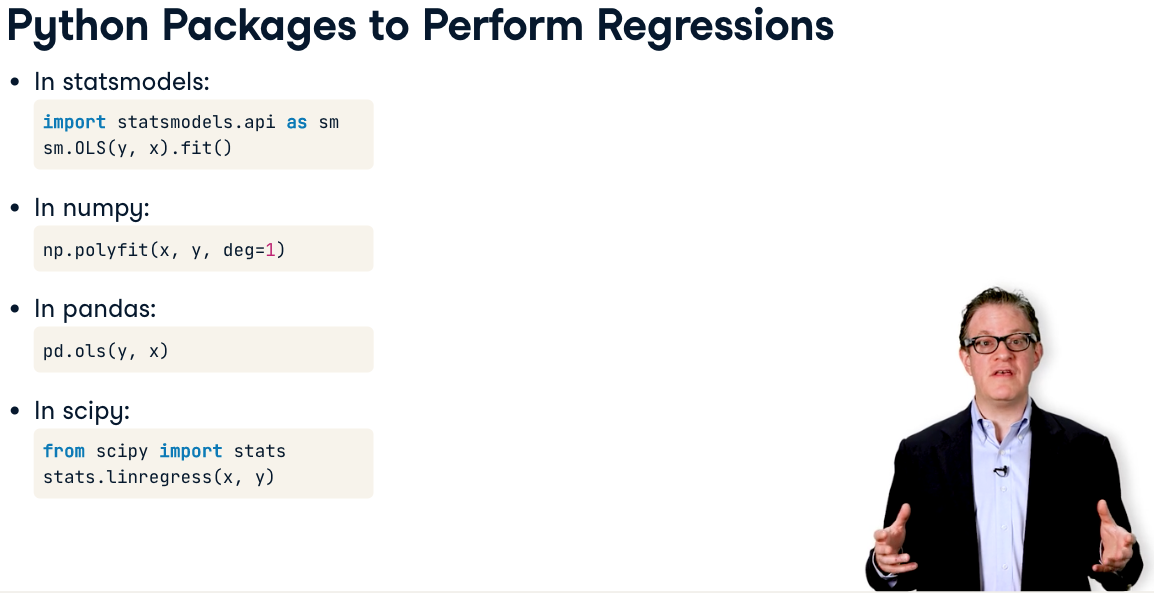

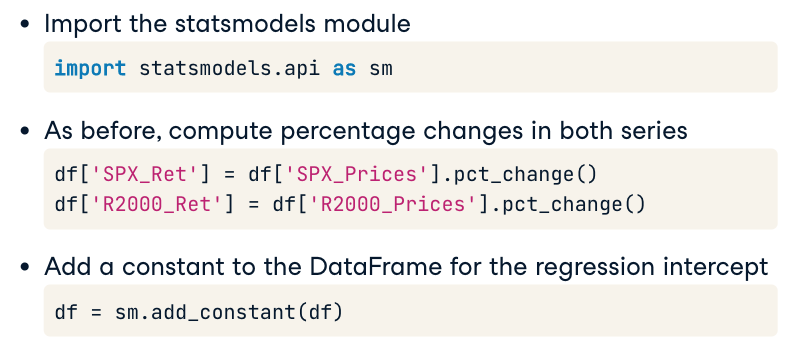

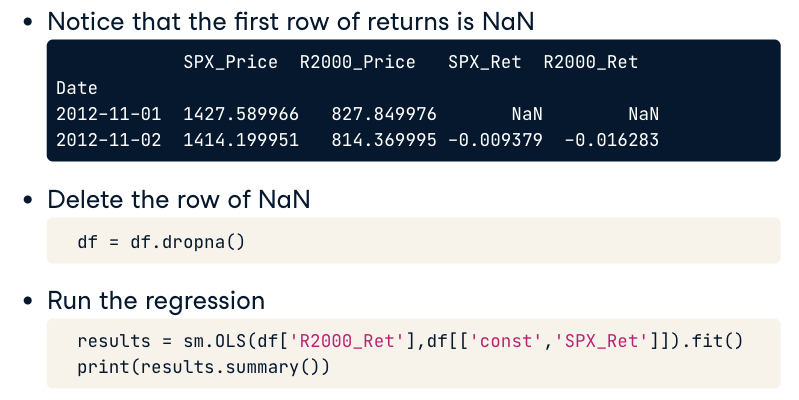

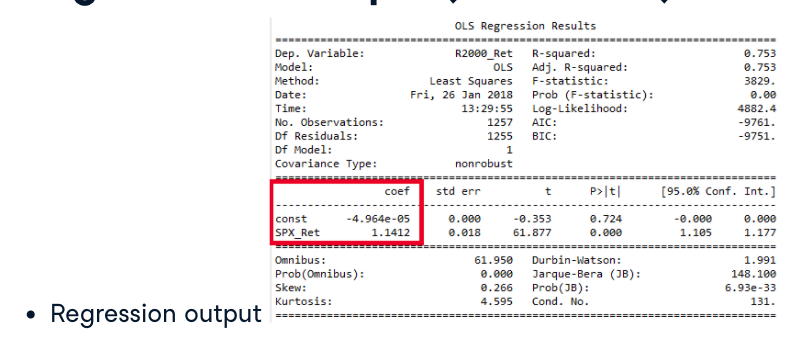

# AUTOCORRELATION (OR SERIAL CORRELATION)


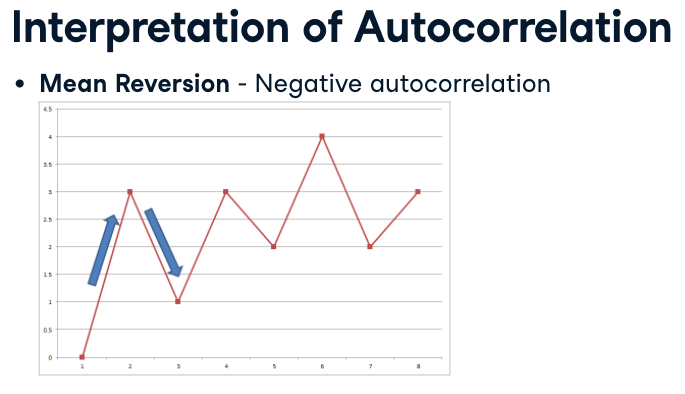

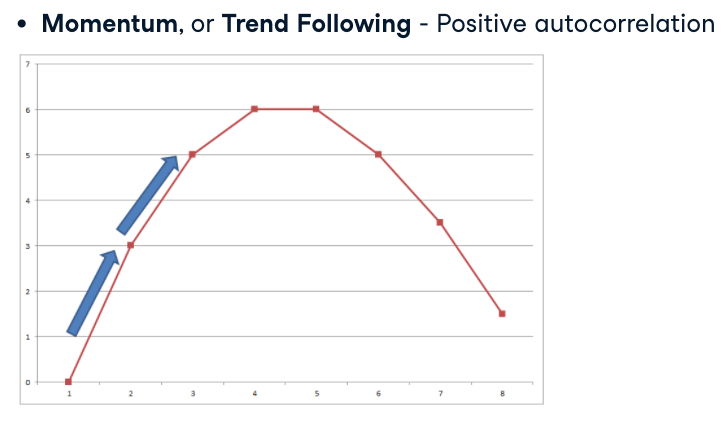

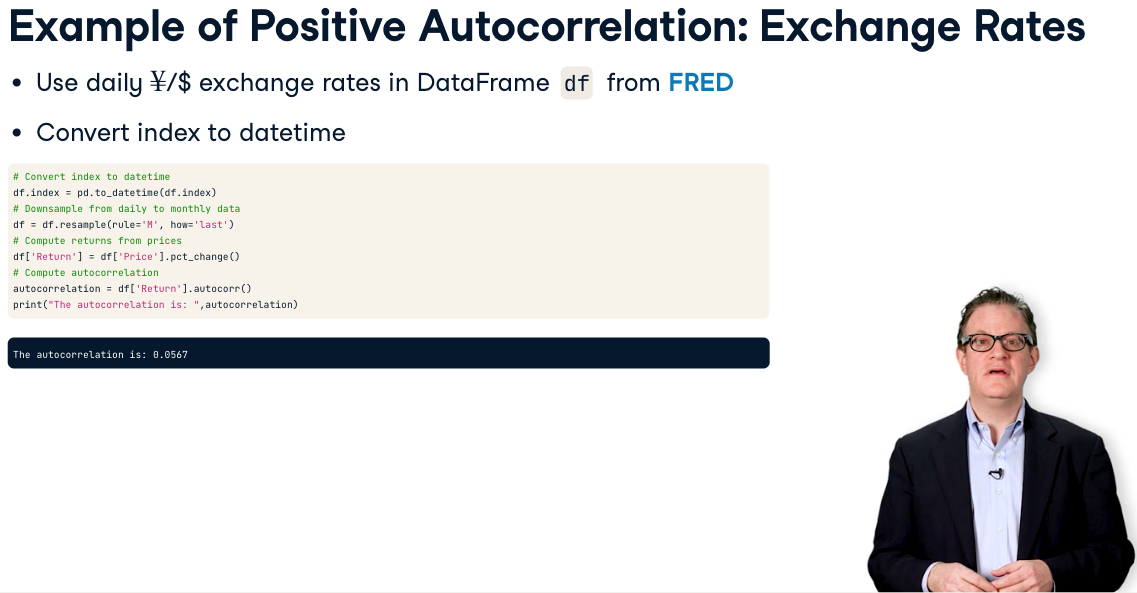


# AUTOCORRELATION FUNCTION (ACF)

The sample autocorrelation function, or ACF,shows not only the lag-one autocorrelation, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

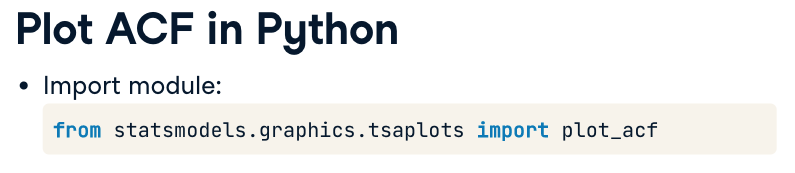

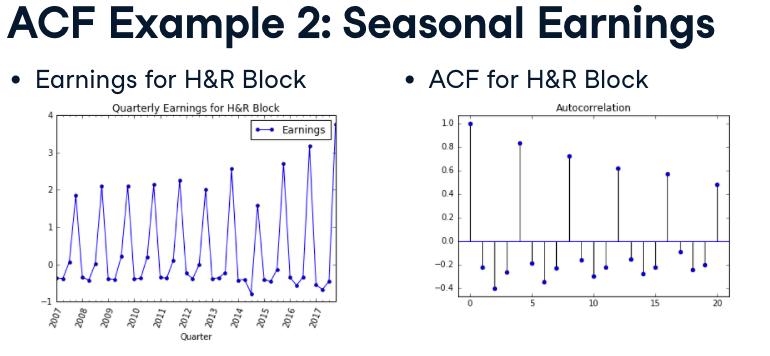
you can clearly see a seasonal pattern in the quarterly data on the left, and the autocorrelation function on the right shows strong autocorrelation at lags 4, 8, 12, 16, and 20

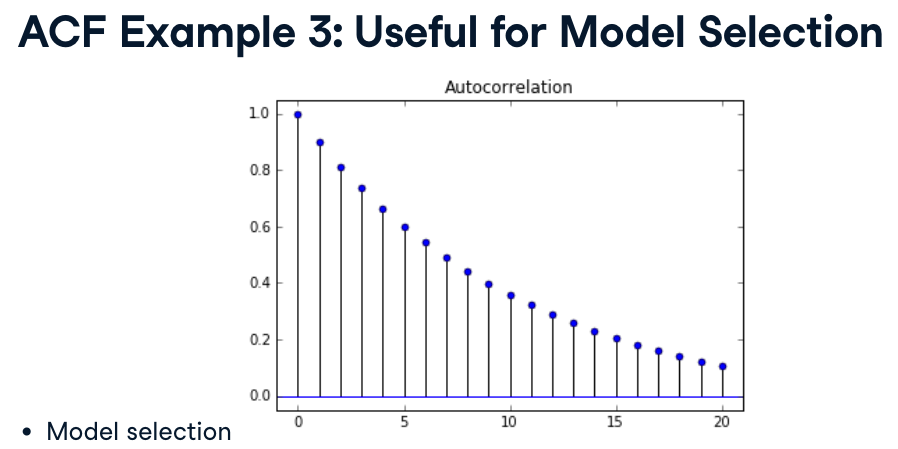
The ACF can also be useful for selecting a parsimonious model for fitting the data. Parsimonious models are simple models with great explanatory predictive power. They explain data with a minimum number of parameters, or predictor variables. The idea behind parsimonious models stems from Occam's razor, or “the law of briefness” (sometimes called lex parsimoniae in Latin)

In this example, the pattern of the autocorrelation suggests a model for the series



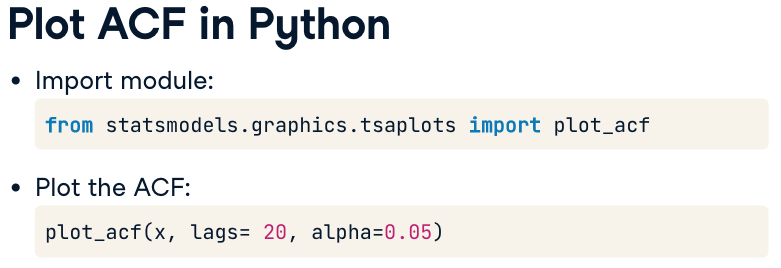
plot_acf is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval

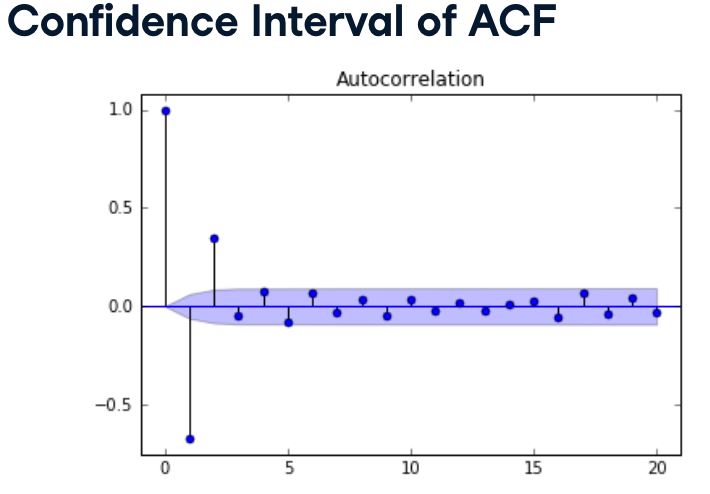
An ACF plot that contains confidence intervals for each lag, which is the blue region in the figure.
alpha determines the width of the confidence intervals. For example, if alpha equals 0-point-05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. You will get a wider confidence interval if you set alpha lower, or if you have fewer observations. An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, is plus or minus 2 over the square root of the number of observations in your series. Incidentally, if you don't want to see confidence intervals in your plot, set alpha equal to one.

# WHITE NOISE

 a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags. There are several special cases of White Noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called Gaussian White Noise.
 
 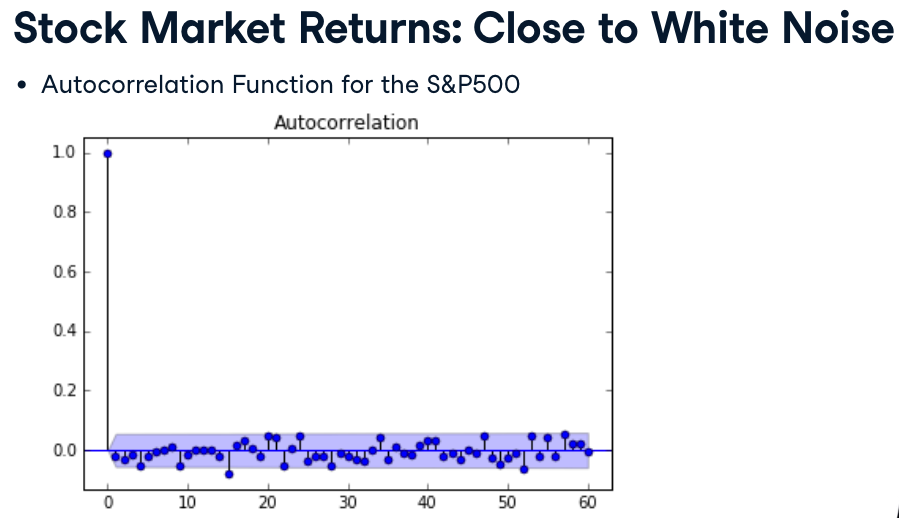

# RANDOM WALK

In a random walk, today's price is equal to yesterday's price plus some noise. 

The change in price of a random walk is just White Noise. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise. You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

## Random Walk with Drift
In a random walk with drift, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.

## Statistical Test for Random Walk
To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk.

An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero. This is called the "Dickey-Fuller" test. If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.

## Augmented Dickey Fuller Test
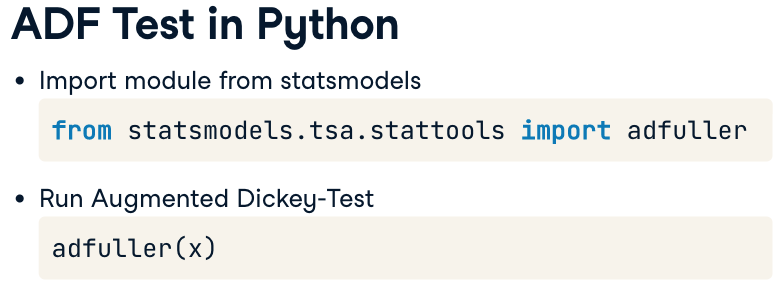

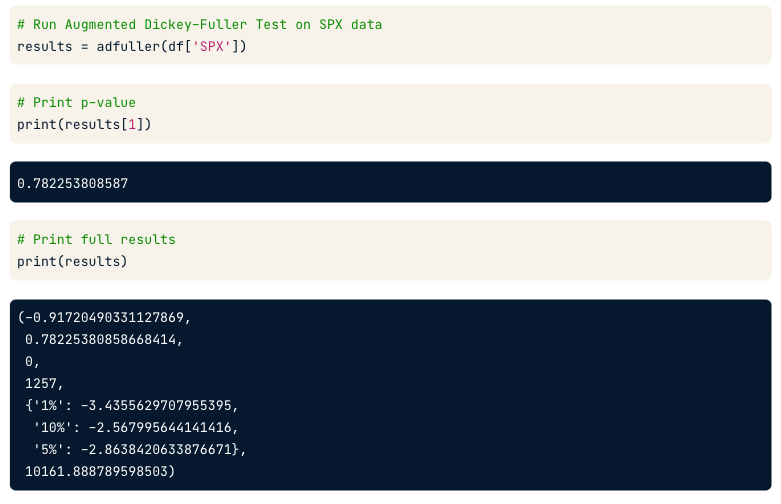
As an example, let's run the Augmented Dickey-Fuller test on a time series of S&P500 prices using the adfuller function. The results are stored in results. The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, the p-value is much higher than point-05 - it's 0-point-78. Therefore, we cannot reject the null hypothesis that the S&P500 is a random walk. You can also print out the full output of the test, which gives other information, like the number of observations (1257), the test statistic (-point-917) and the critical values of the test statistic for various alphas - 1%, 10%, and 5%.

# STATIONARITY

Stationarity defined: the joint distribution of the observations do not depend on time. A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.
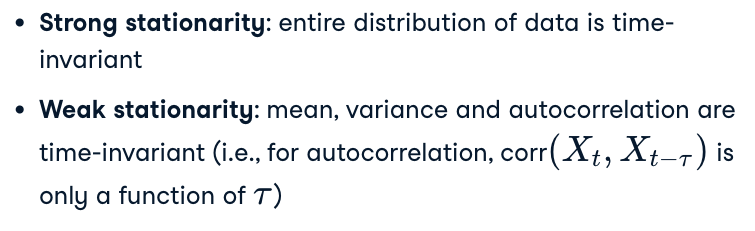

If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.

## Transforming NonStationary Series Into Stationary Series
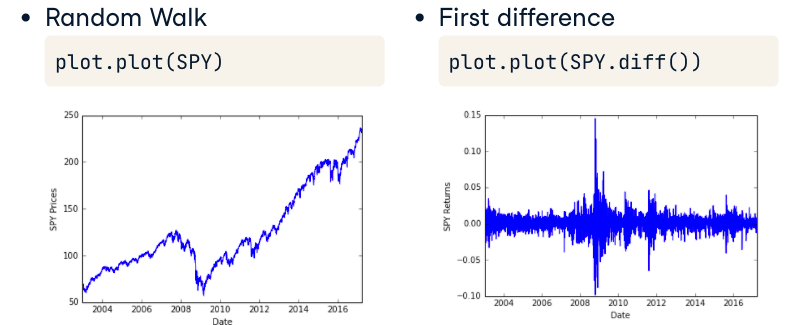
Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary. On the left are S&P500 prices, which is a non-stationary random walk, but if you compute first differences on the right, it becomes a stationary white noise process.

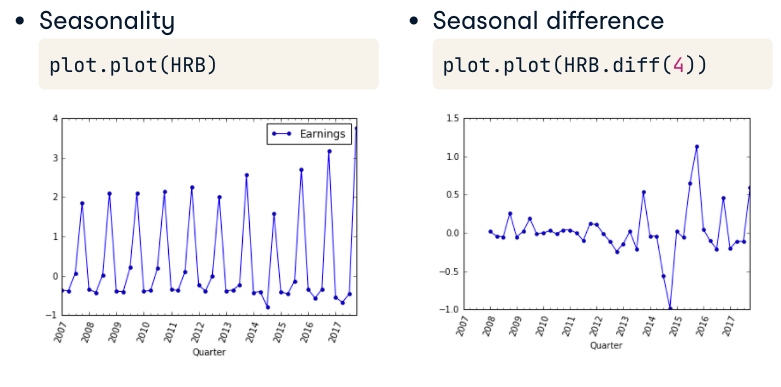
On the left, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary.

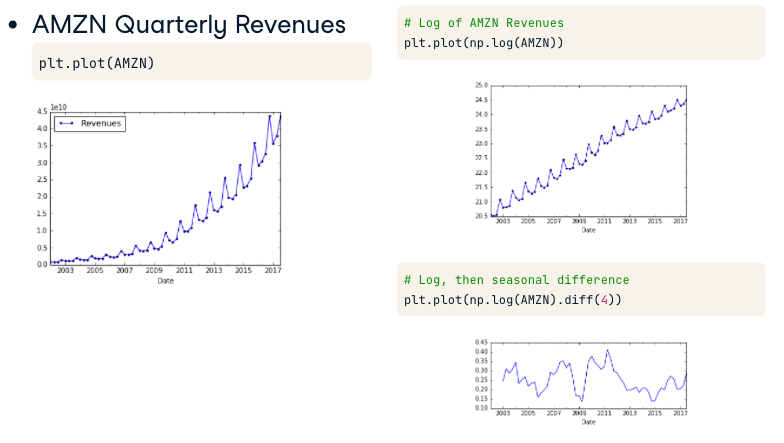
Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

# AUTOREGRESSIVE (AR) MODELS


### 1. Introducing an AR Model
In an Autoregressive model, or AR model, today's value equals a mean plus a fraction phi of yesterday's value, plus noise. Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.

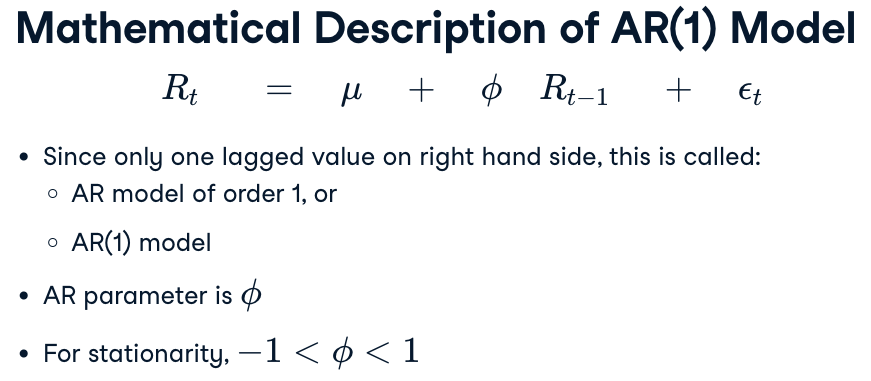

### 3. Interpretation of AR(1) Parameter
As an example, suppose R_t is a time series of stock returns. If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. This was referred to as "mean reversion" in Chapter 1. On the other hand, if phi is positive, then a positive return last period implies that this period's return is expected to be positive.

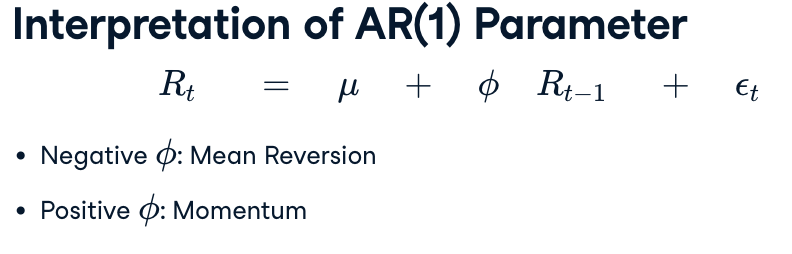

### 4. Comparison of AR(1) Time Series
Here are four simulated time series with different AR parameters. When phi equals 0.9, it looks close to a random walk. When phi equals minus 0.9, the process looks more erratic - a large positive value is usually followed by a large negative one. The bottom two are similar, but are less exaggerated and closer to white noise.

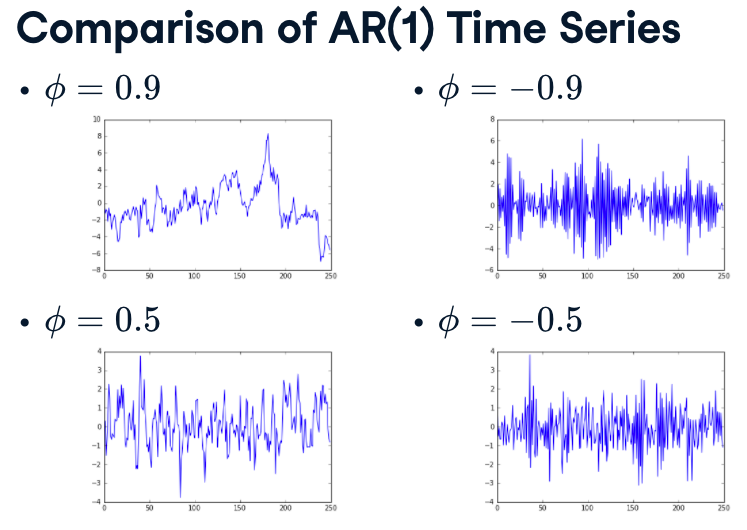

### 5. Comparison of AR(1) Autocorrelation Functions
Here are four autocorrelation functions for different AR parameters. The autocorrelation decays exponentially at a rate of phi. Therefore if phi is 0-point-9, the lag-1 autocorrelation is 0-point-9, the lag-2 autocorrelation is 0-point-9 squared, the lag-3 autocorrelation is 0-point-9 cubed, etc. When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.

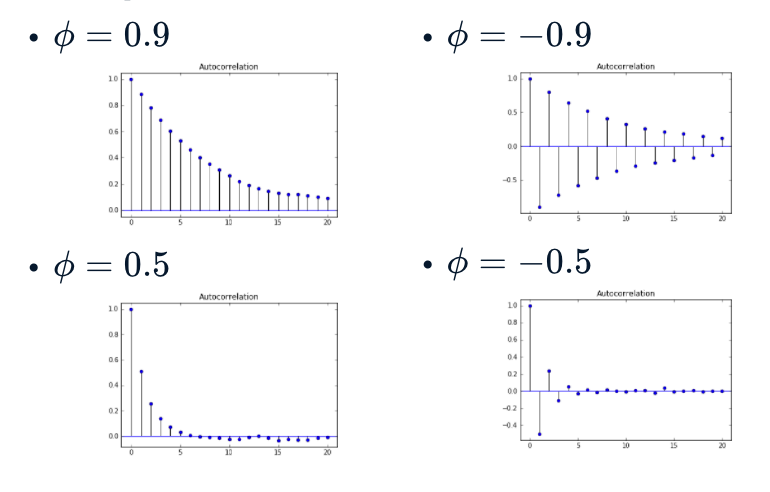

### 6. Higher Order AR Models
So far, we've been only looking at AR(1) models. The model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3). 

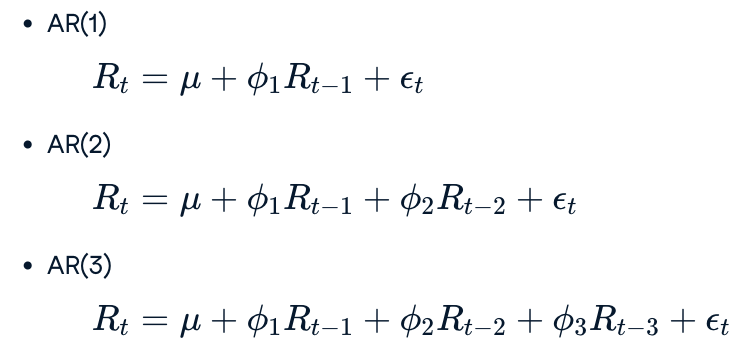

### 7. Simulating an AR Process
Often, if you want to study and understand a pure AR process, it is useful to work with simulated data. Statsmodels provides modules for simulating AR processes:

- First, import the class, ArmaProcess. 
- Then define the order and parameters of the AR process. The convention is a little counterintuitive: 
    - You must include the zero-lag coefficient of 1, 
    - and the sign of the other coefficient is the opposite of what we have been using. 
    - For example, for an AR(1) process with phi equal to plus 0.9, the second element of the ar array should be the opposite sign, *minus 0.9*. 
    - You also have to input the MA parameters. SEE NEXT SECTION
- Then, you create an instance of the class ArmaProcess. 

To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

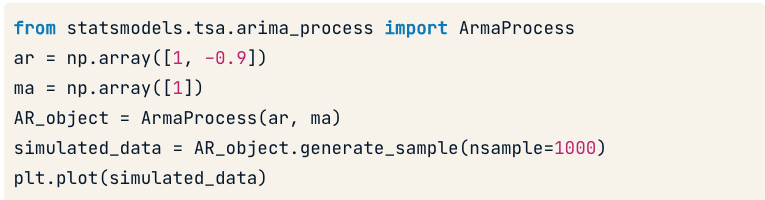

# ESTIMATING AN AR MODEL

### 1. Estimating and Forecasting an AR Model
Statsmodels has another module for estimating the parameters of a given AR model.

### 2. Estimating an AR Model
Import ARMA, which is a class, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. The order (1,0) means you're fitting the data to an AR(1) model. An order (2,0) would mean you're fitting the data to an AR(2) model. The second part of the order is the MA part, DISCUSSED BELOW. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.
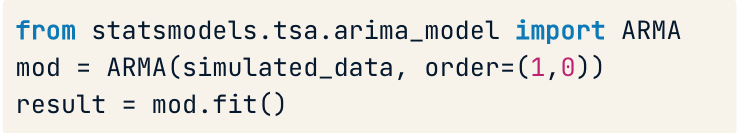

### 3. Estimating an AR Model
To see the full output, use the summary method on result. The coefficients for the mean mu and AR(1) parameter phi are highlighted in red. In the simulated data, mu was zero and phi was 0-point-9, and you can see that the estimated parameters are very close to the true parameters.
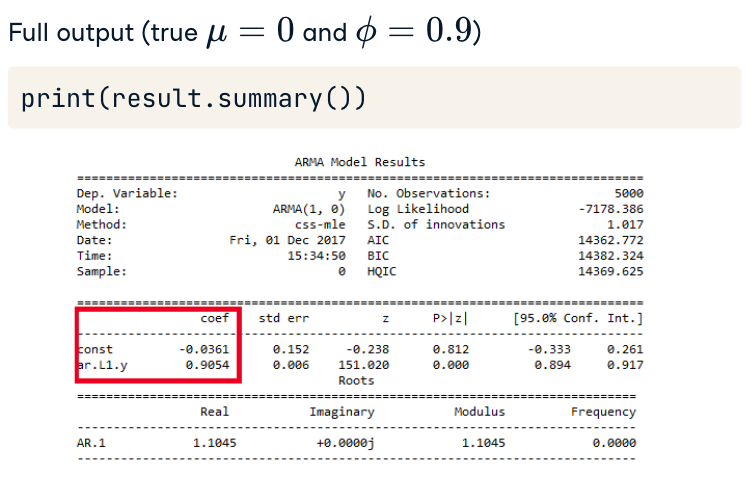

### 4. Estimating an AR Model
If you just want to see the coefficients rather than the entire regression output, you can use the dot-params property, which returns an array of the fitted coefficients, mu and phi in this case.
- PRINT(RESULT.PARAMS)

### 5. Forecasting an AR Model
To do forecasting, both in sample and out of sample, you still create an instance of the class using ARMA, and you use the fit method just as you did in the last two slides to *estimate* the parameters. But now, use the method plot_predict to do forecasting. You give it the start and end data points for fitting. If the index of the data is a DatetimeIndex object as it is here, you can pick dates for the start and end date. The plot also gives confidence intervals around the out-of-sample forecasts. Notice how the confidence interval gets wider the farther out the forecast is.
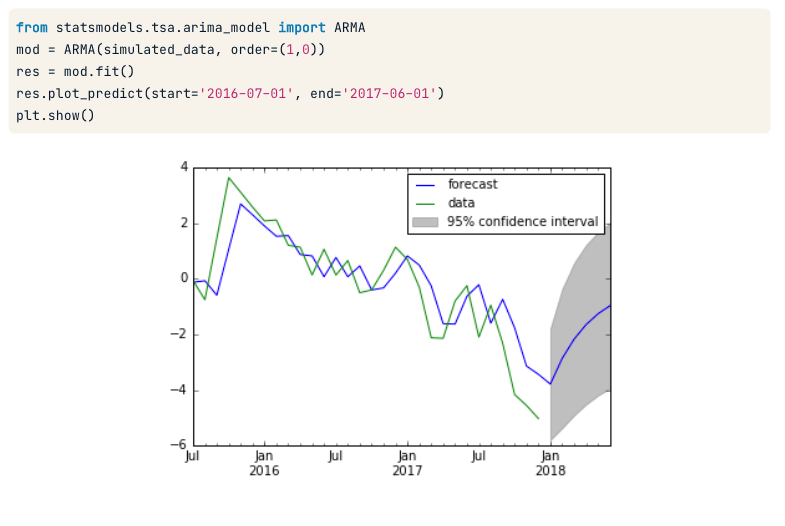

# CHOOSING THE RIGHT MODEL


### 1. Identifying the Order of an AR Model
In practice, you will ordinarily not be told the order of the model that you're trying to estimate. There are two techniques that can help determine the order of the AR model: 
 - The Partial Autocorrelation Function
 - Information Criteria

### 2. Partial Autocorrelation Function (PACF)
The Partial Autocorrelation Function measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficients in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.
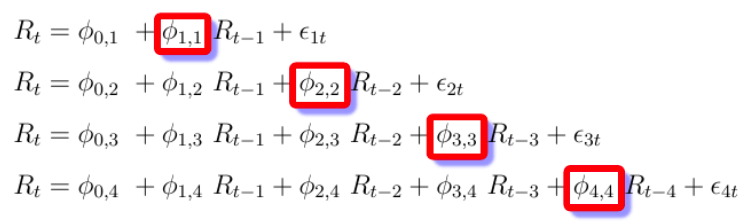

### 3. Plot PACF in Python
plot_pacf is the statsmodels function for plotting the partial autocorrelation function. The arguments are the same as that of the plot_acf module that you saw earlier. The input x is a series or array. The argument lags indicates how many lags of the parital autocorrelation function will be plotted. And the alpha argument sets the width of the confidence interval.
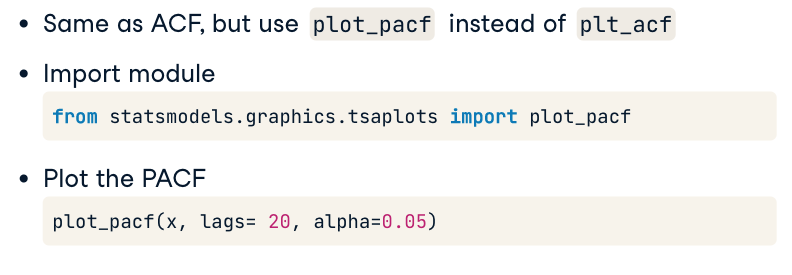

### 4. Comparison of PACF for Different AR Models
These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper left, for an AR(1) model, only the lag-*1* PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero, and for and AR(3), three lags are different from zero. Finally, for White Noise, there are no lags that are significantly different from zero.
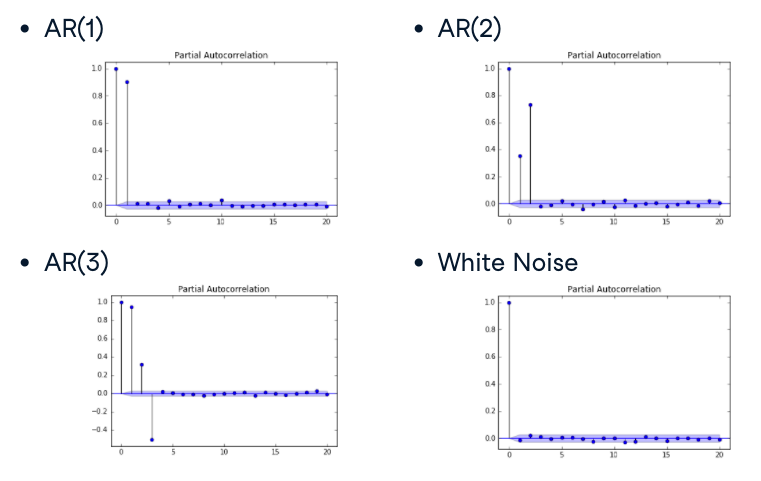
* THE PACF WILL REVEAL THE ORDER OF THE MODELED DATA

### 5. Information Criteria
The more parameters in a model, the better the model will fit the data. But this can lead to overfitting of the data. The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called:
- Akaike Information Criterion
- Bayesian Information Criterion.

This is the full output from estimating an AR(2) model. The AIC and BIC are highlighted in the red box. 
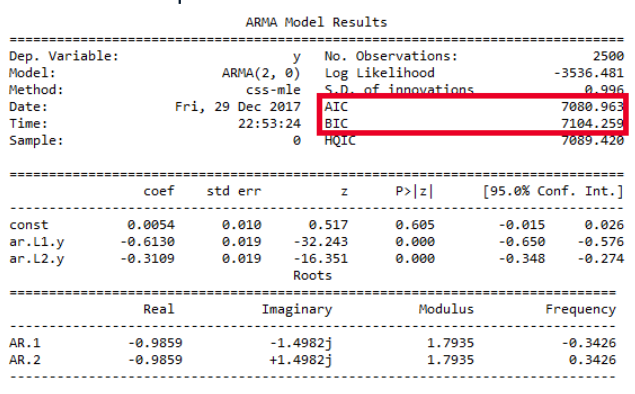

### 7. Getting Information Criteria From `statsmodels`
To get the AIC and BIC statistics, you follow the same procedure from the last section to fit the data to a model. In the last section, you learned how to get the full output using summary or just the AR parameters using the params attribute. You can also get the AIC or BIC using those attributes. 
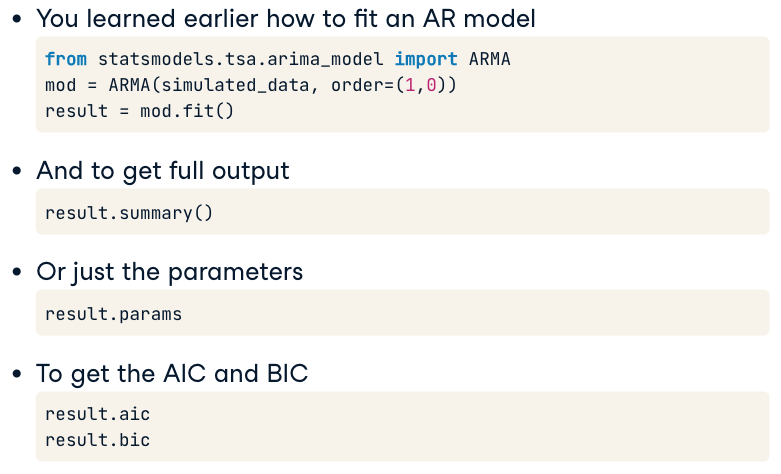

### 8. Information Criteria
In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion. Suppose we are given a time series of data, and unknown to us, it was simulated from an AR(3) model. Here is a plot of the BIC when we fit the data to an AR(1) up to an AR(8) model. You can see that the lowest BIC occurs for an AR(3).
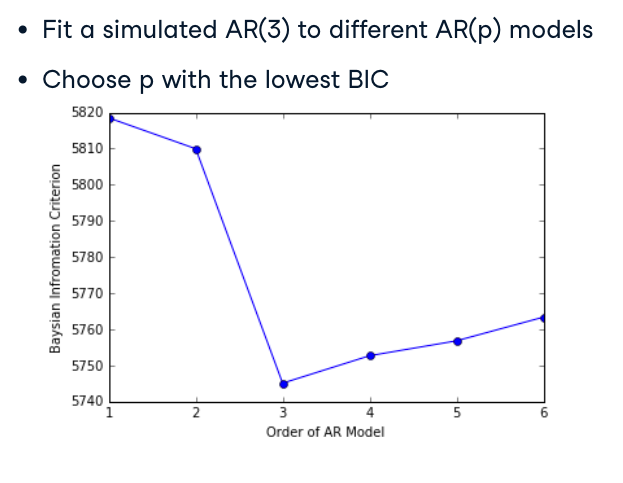

# MOVING AVERAGE (MA) and ARMA MODELS

2. Mathematical Description of MA(1) Model
In a Moving Average, or MA model, today's value equals a mean plus noise, plus a fraction theta of yesterday's noise. Since there is only one lagged error on the right hand side, this is called an MA model of order 1, or simply an MA(1) model. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.

3. Interpretation of MA(1) Parameter
Suppose R t is a time series of stock returns. If theta is negative, then a positive shock last period, represented by epsilon t-1, would have caused last period's return to be positive, but this period's return is more likely to be negative. A shock two periods ago would have no effect on today's return - only the shock now and last period. Also, note that the lag-1 autocorrelation turns out not to be theta, but theta over 1 plus theta squared.
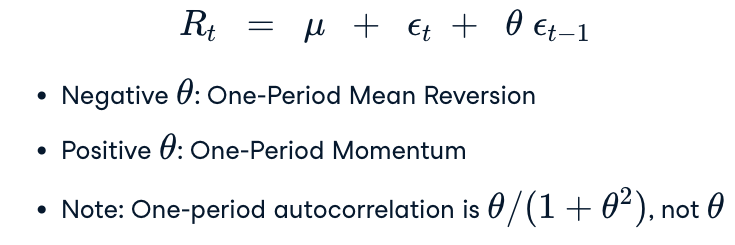

4. Comparison of MA(1) Autocorrelation Functions
Here are four autocorrelation functions for different MA parameters. In each case, there is zero autocorrelation for an MA(1) beyond lag-1. When theta is positive, the lag-1 autocorrelation is positive and when theta is negative, the lag-1 autocorrelation is negative.
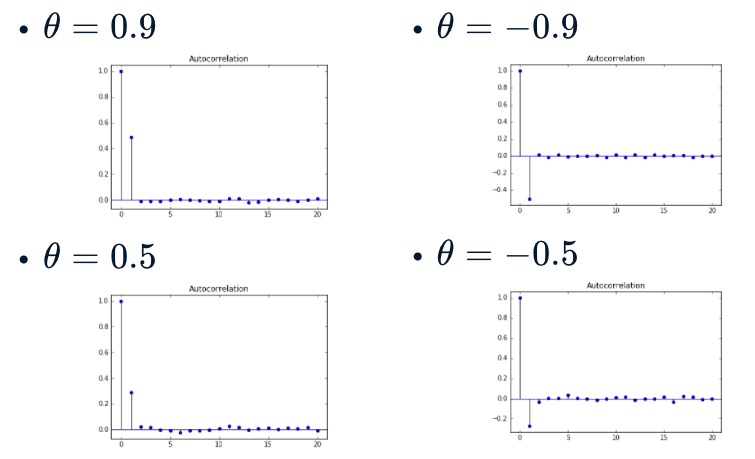

5. Example of MA(1) Process: Intraday Stock Returns
Higher frequency stock returns are a nice example of an MA(1) process. Here is an intraday plot for the stock price of Sprint Corporation for one day. The frequency of the data is one minute. Stocks trade at discrete one-cent increments rather than at continuous prices, and you can see that the stock can bounce back and forth over a one-cent range for long periods of time. This is sometimes referred to as the "bid/ask bounce".
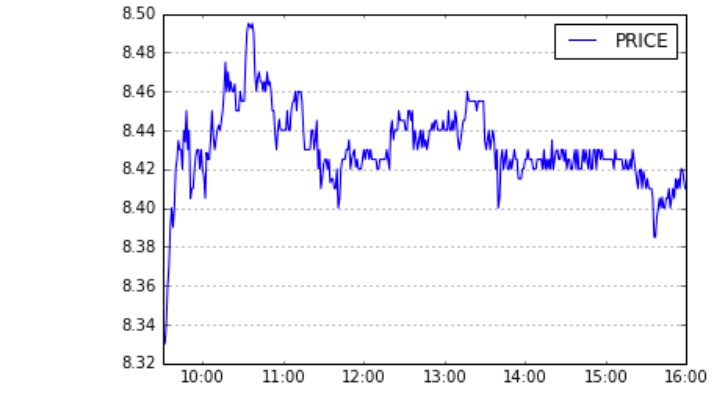

6. Autocorrelation Function of Intraday Stock Returns
The bid/ask bounce induces a negative lag-1 autocorrelation, but no autocorrelation beyond lag-1. You can see this with the autocorrelation function plot of intraday returns. The lag-1 autocorrelation is significantly negative, and the other autocorrelations are not significantly different from zero.
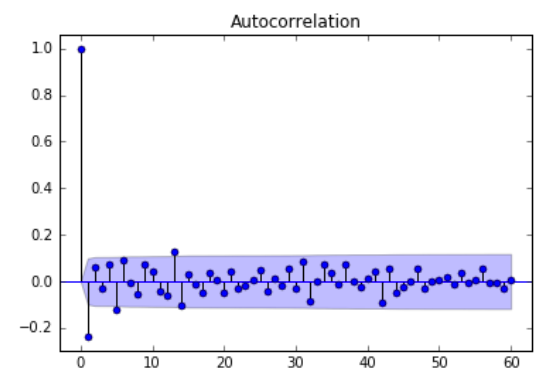

7. Higher Order MA Models
So far, we've been only looking at MA(1) models. The model can be extended to include more lagged errors and more theta parameters. Here we show an MA(1), an MA(2), and an MA(3) model.
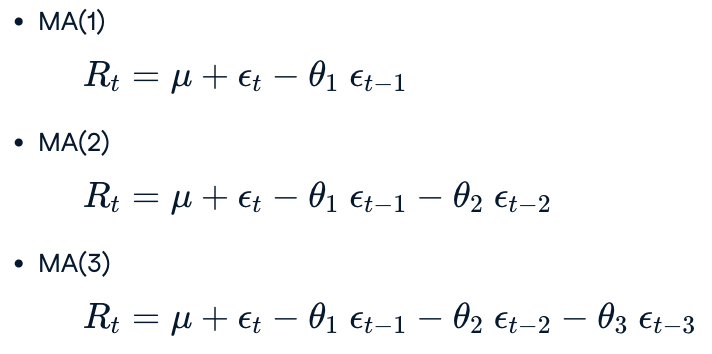

8. Simulating an MA Process
Just like in the last chapter with AR models, you may want to simulate a pure MA process. You can use the same statsmodels module, ArmaProcess. This time, for an MA(1), the AR order is just an array containing 1. The MA order is an array containing 1 and the MA(1) parameter theta. Unlike with the AR simulation, you don't need to reverse the sign of theta. As before, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.
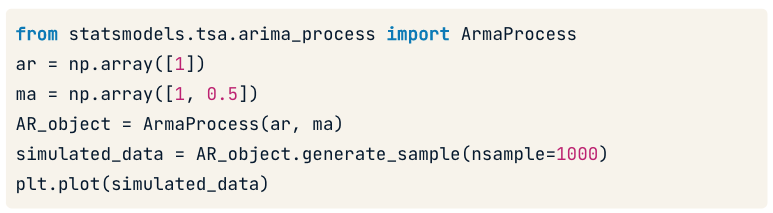

# ESTIMATING AND FORCASTING AN MA MODEL

1. Estimating an MA Model
The same module that you used to estimate the parameters of an AR model can be used to estimate the parameters of an MA model. Import the class ARMA as before, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. However, now the order is (0,1), for an MA(1), not (1,0) for an AR(1). And as before with an AR model, once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.
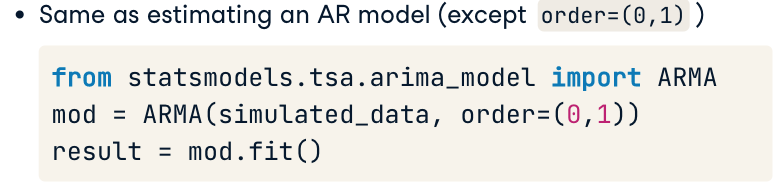

2. Forecasting an MA Model
The procedure for forecasting an MA model is the same as that for an AR model: you again create an instance of the class using ARMA, and you use the fit method to *estimate* the parameters. Of course, to estimate an MA model, set the order to (0,1), then use the method plot_predict to do forecasting as you did for forecasting an AR model. One thing to note is that with an MA(1) model, unlike an AR model, all forecasts beyond the one-step ahead forecast will be the same.
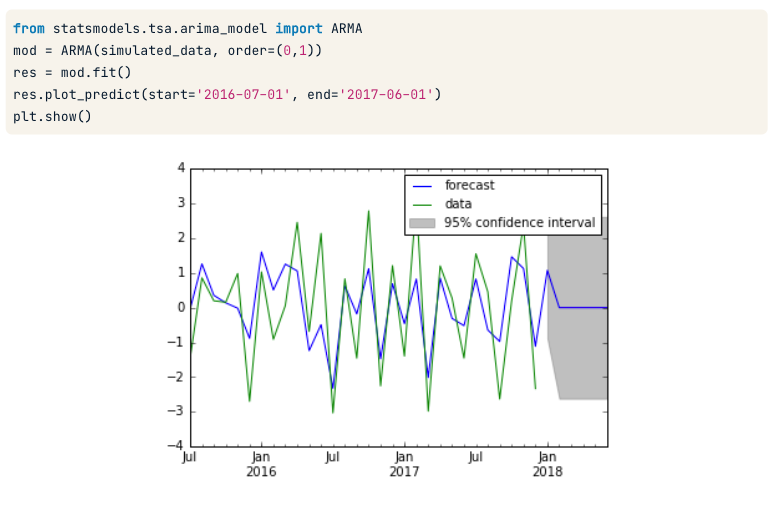

# ARMA MODELS

### 1. ARMA Model
An ARMA model is a combination of an AR and MA model. Here is the formula for an ARMA(1,1) model, which has the familiar AR(1) and MA(1) components.
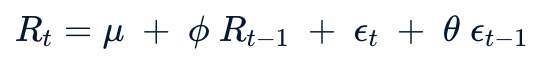

### 2. Converting Between ARMA, AR, and MA Models
ARMA models can be converted to pure AR or pure MA models. Here is an example of converting an AR(1) model into and MA(infinity) model. The first line is an AR(1) model. Then, in the second line, the AR(1) equation is substituted for R t-1. You do the same for R t-2 in the third line, etc., and you eventually end up with an MA(infinity) model with coefficients phi, phi squared, phi cubed, etc.
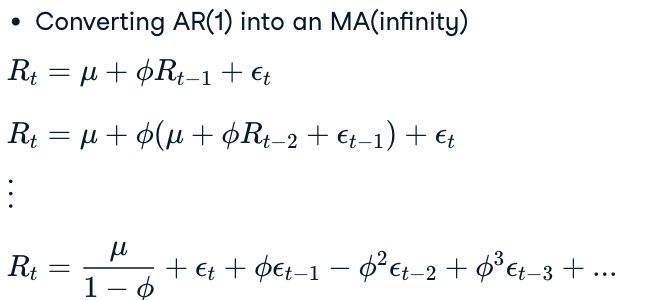

# PUTTING IT ALL TOGETHER

# Cointegration Models


### 2. What is Cointegration?
The idea behind cointegration is that even if the prices of two different assets both follow random walks, it is still possible that a linear combination of them is not a random walk. If that's true, then even though P and Q are not forecastable because they're random walks, the linear combination is forecastable, and we say that P and Q are cointegrated.
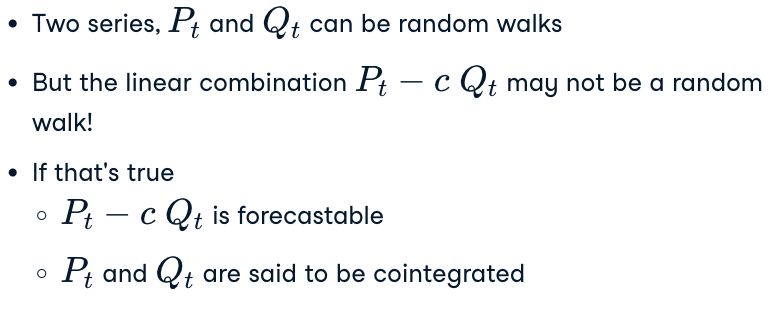

### 3. Analogy: Dog on a Leash
The best analogy I've heard is of a dog owner walking his dog with a retractable leash. If you look at the position of the dog owner, it may follow a random walk, and if you look at the position of the dog separately, it also may follow a random walk, but the distance between them, the difference of their positions, may very well be mean reverting: if the dog is behind the owner, he may run to catch up and if the dog is ahead, the length of the leash may prevent him from getting too far ahead. The dog and its owner are linked together and their distance is a mean reverting process.
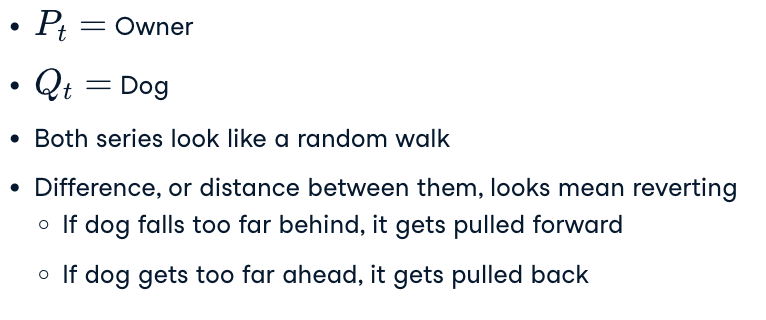

### 4. Example: Heating Oil and Natural Gas
Both Heating Oil prices and Natural Gas prices look like they're random walks.
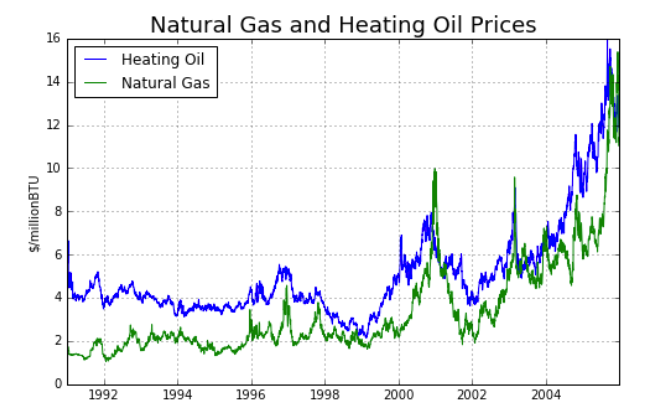

### 5. Example: Heating Oil and Natural Gas
But when you look at the spread, or difference between them, the series looks like it's mean reverting. For example, when heating oil spiked down relative to natural gas in 2001, the spread reverted back.
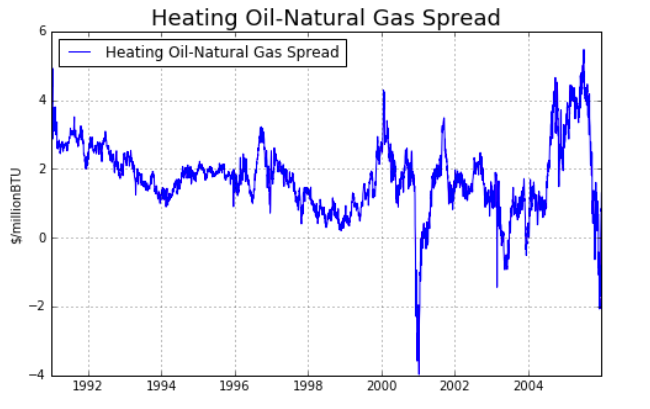

### 6. What Types of Series are Cointegrated?
With commodities, there may be economic forces that link the two prices. Consider heating oil and natural gas. Some power plants have the ability to use either one, depending on which has become cheaper. So when heating oil has dipped below natural gas, increased demand for heating oil will push it back up. Platinum and Palladium are substitutes in some types of catalytic converters used for emission control. Corn and wheat are substitutes for animal feed. Corn and sugar are substitutes as sweeteners, etc. How about bitcoin and ethereum? In one of the exercises, you'll look at whether they are cointegrated. For stocks, a natural starting point for identifying cointegrated pairs are stocks in the same industry. However, competitors are not necessarily economic substitutes. Think of Apple and Blackberry. It's not necessarily the case that when one of those company's stock price jumps up, the other catches up. In this case, it's more like the dog broke the leash and ran way from the owner.
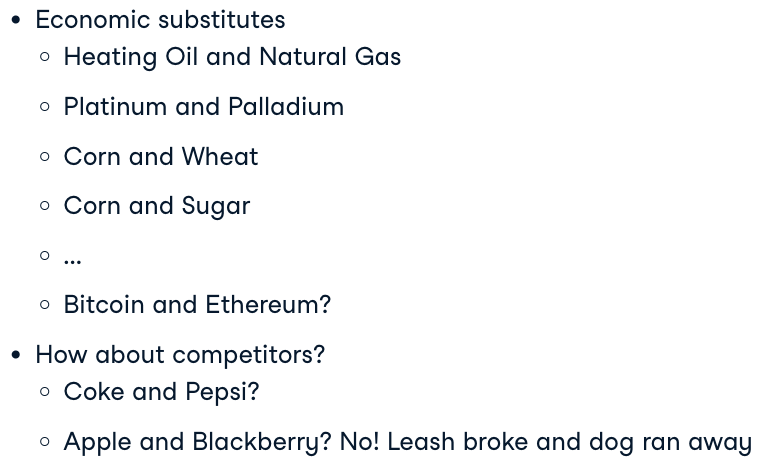

### 7. Two Steps to Test for Cointegration
You can break down the process for testing whether two series are cointegrated into two steps. First, you regress the level of one series on the level of the other series, to get the slope coefficient c. Then, you run the Augmented Dickey-Fuller test, the test for a random walk that you learned about in the second chapter, on the linear combination of the two series. Alternatively, statsmodels has a function coint that combines both steps.
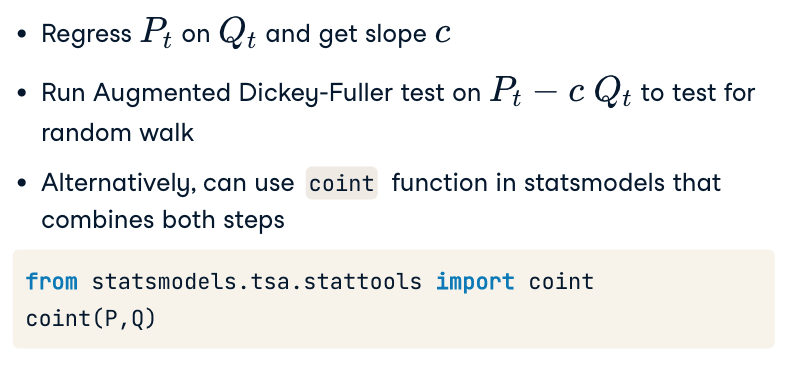



# Case Study: Climate Change



### 1. Analyzing Temperature Data
As a final exercise that will pull together many of the concepts throughout this course, you'll analyze some temperature data taken over almost 150 years. The data was downloaded from the NOAA website. 

First, you'll practice some pandas methods by converting the index to datetime and plotting the data. 

Then, you'll run the Augmented Dickey-Fuller test to see whether the data is a Random Walk. 

Then, you'll take first differences of the data to transform it into a stationary series, and compute the Autocorrelation Function and the Partial Autocorrelation Function of the data. 

Using that as a guide, you'll fit a few AR, MA, and ARMA models to the data. 

Then you'll use the Information Criterion to choose the best model among the ones you looked at. Finally, with the best model, you'll forecast temperatures over the next 30 years.

# Further Study

Congratulations on mastering the time series introductory material. This course will hopefully have given you the foundation to learn about more advanced time series concepts. Some more advanced topics are 
- GARCH Models,
- Nonlinear Models,
- Multivariate Time Series Models,
- Regime Switching Models,
- State Space Models
- Kalman Filtering